In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 16
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

import covid19

PALETTE = sns.color_palette()

## data

In [15]:
istat_path = 'comuni_giornaliero.csv'
_, istat = covid19.data.read_istat(istat_path)
# _, istat_all = covid19.data.read_istat(istat_path, drop=False)
istat = istat.sel(time=slice(None, '2020-06-30'))
istat

<xarray.DataArray (year: 6, time: 121, age_class: 6, location: 7898)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan,  1.],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0., nan, nan, ..., nan,  1., nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan,  0., nan]],

        ...,

        [[ 1., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan,  0., nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan,  0.],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0., nan, nan, ..., nan,  0., nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan,  0., nan]],

        ...,

        [[ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan,  0., nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan,  0.],
         [ 1., nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [ 0., nan, nan, ..., nan, nan, nan],
         [ 1., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

      

In [4]:
istat.sel(year=2020).sum('location')

<xarray.DataArray (time: 366, age_class: 6)>
array([[ 56.,  75., 164., 337., 750., 507.],
       [ 41.,  87., 164., 379., 720., 476.],
       [ 42.,  88., 170., 355., 758., 498.],
       ...,
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2022-07-10
  * age_class  (age_class) object '0-49' '50-59' '60-69' '70-79' '80-89' '90+'
    year       int64 2020

In [5]:
mar_15_19_averages = istat.sel(time=slice('2020-03-01', '2020-04-30')).fillna(0).mean(['time', 'year'])
mar_15_19_averages.sum('location').values

array([ 51.36065574,  80.40710383, 170.1010929 , 382.05464481,
       752.90983607, 478.50546448])

In [6]:
jan_feb_20_averages = istat.sel(year=2020, time=slice('2020-01-01', '2020-02-20')).fillna(0).mean('time')
jan_feb_20_averages.sum('location').values

array([ 47.50980392,  78.76470588, 157.90196078, 354.88235294,
       723.7254902 , 505.76470588])

In [7]:
deaths_italy = istat.sel(year=2020).sum('location')

(deaths_italy.sel(time=slice('2020-02-21', '2020-04-30')) - jan_feb_20_averages.sum('location')).sum('time')

<xarray.DataArray (age_class: 6)>
array([  -63.68627451,   576.47058824,  2657.8627451 ,  8716.23529412,
       15966.21568627,  8457.47058824])
Coordinates:
  * age_class  (age_class) object '0-49' '50-59' '60-69' '70-79' '80-89' '90+'
    year       int64 2020

In [8]:
deaths_italy_fraction = deaths_italy / jan_feb_20_averages.sum('location')

deaths_italy_fraction

<xarray.DataArray (time: 366, age_class: 6)>
array([[1.17870409, 0.95220314, 1.03861915, 0.94961048, 1.03630452,
        1.00244243],
       [0.86297978, 1.10455564, 1.03861915, 1.06795956, 0.99485234,
        0.9411491 ],
       [0.88402806, 1.11725168, 1.07661741, 1.00033151, 1.04735844,
        0.98464759],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2022-07-10
  * age_class  (age_class) object '0-49' '50-59' '60-69' '70-79' '80-89' '90+'
    year       int64 2020

## situation report

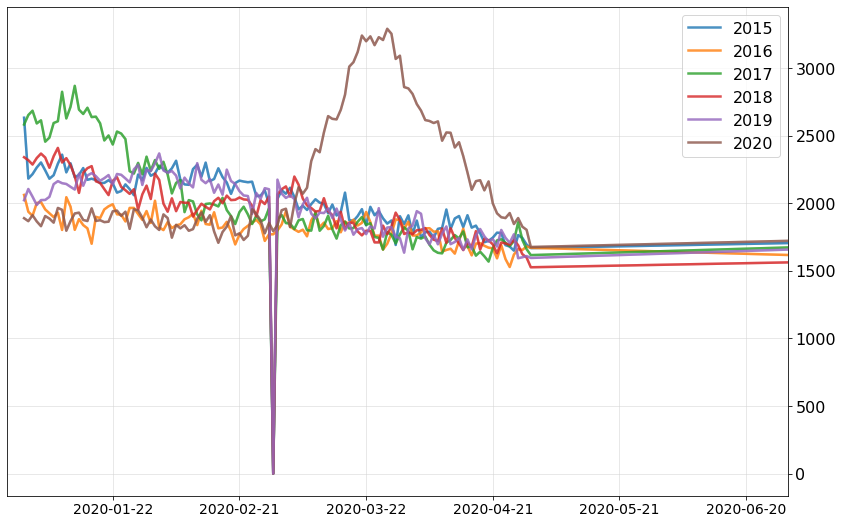

In [9]:
ax = covid19.plot.plot_xarray(istat.sum(['location', 'age_class']), hue='year', xlim=(np.datetime64('2019-12-28'), np.datetime64('2020-06-30')))
_ = ax.legend()

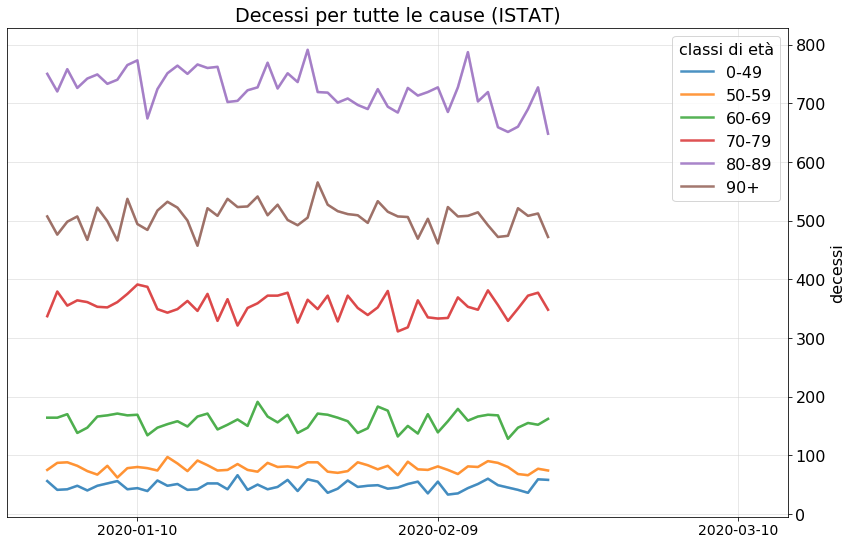

In [10]:
ax = covid19.plot.plot_xarray(deaths_italy.sel(time=slice('2020-01-01', '2020-02-20')), window=1, xlim=(np.datetime64('2019-12-28'), np.datetime64('2020-03-15')))
_ = ax.set(
    title='Decessi per tutte le cause (ISTAT)',
    ylabel='decessi'
)
_ = ax.legend(title='classi di età', loc='upper right')

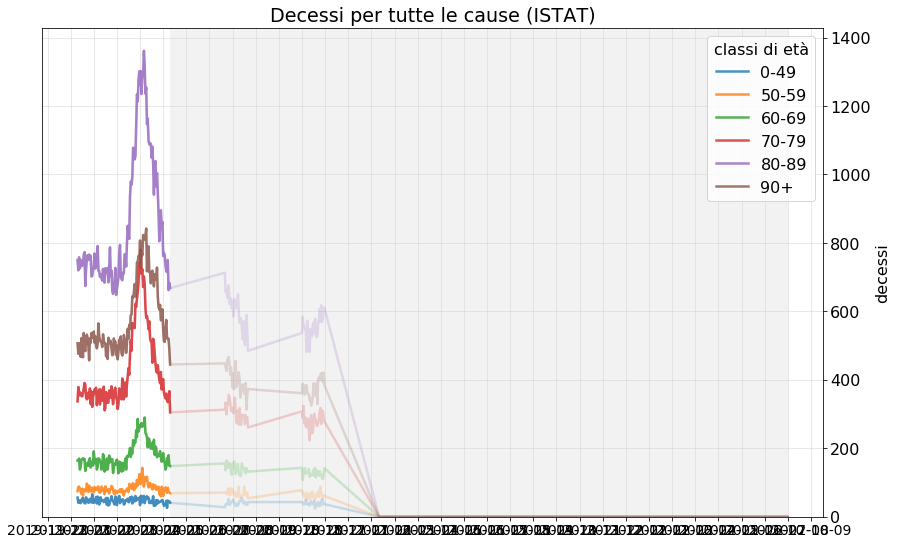

In [16]:
ax = covid19.plot.plot_xarray(deaths_italy, foreground_interval=(None, '2020-04-30'))
_ = ax.set(
    title='Decessi per tutte le cause (ISTAT)',
    ylabel='decessi'
)
_ = ax.legend(title='classi di età')

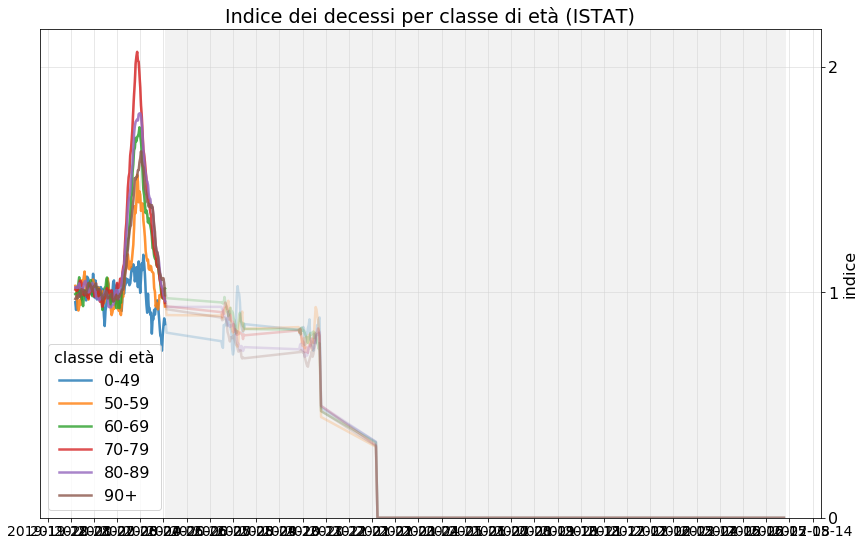

In [12]:
ax = covid19.plot.plot_xarray(deaths_italy_fraction, window=5, foreground_interval=(None, '2020-04-28'))
# foreground_hue=['50-59', '60-69', '70-79', '80-89', '90+']
_ = ax.set(
    title='Indice dei decessi per classe di età (ISTAT)',
    ylabel='indice',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='classe di età')

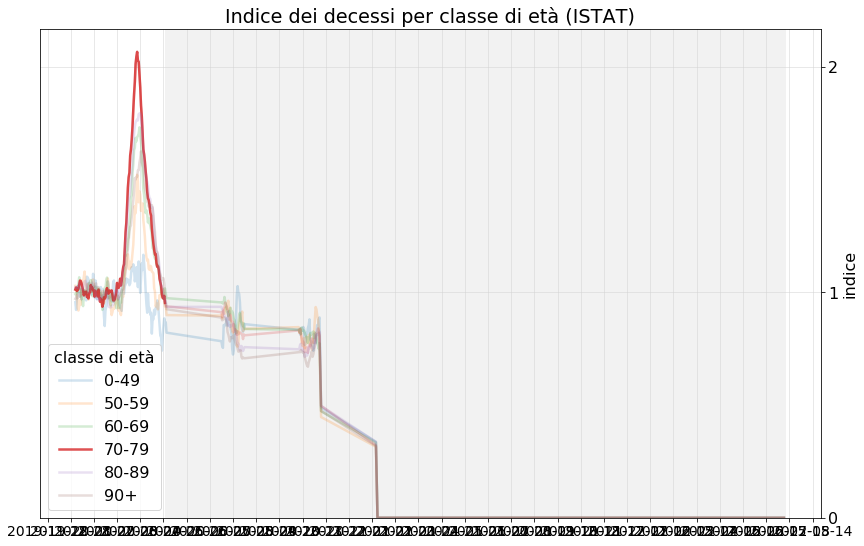

In [13]:
ax = covid19.plot.plot_xarray(deaths_italy_fraction, window=5, foreground_hue=['70-79'], foreground_interval=(None, '2020-04-28'))
# foreground_hue=['50-59', '60-69', '70-79', '80-89', '90+']
_ = ax.set(
    title='Indice dei decessi per classe di età (ISTAT)',
    ylabel='indice',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='classe di età')

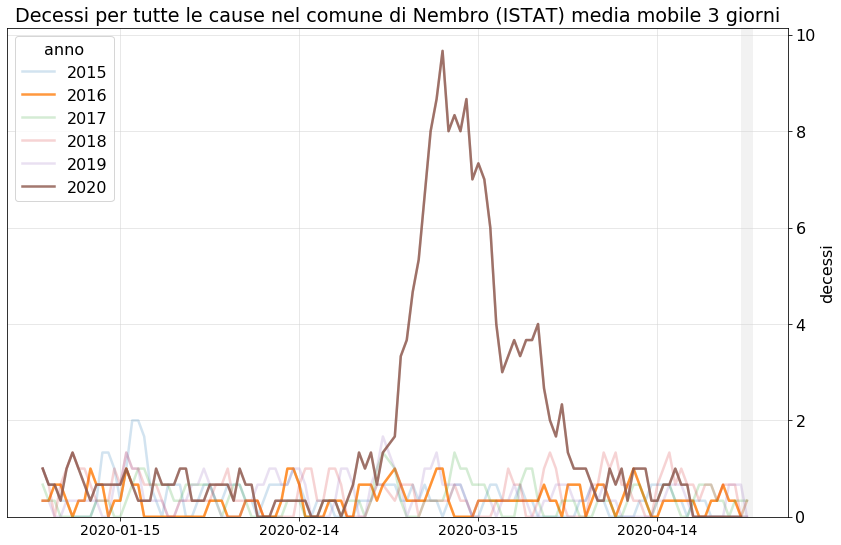

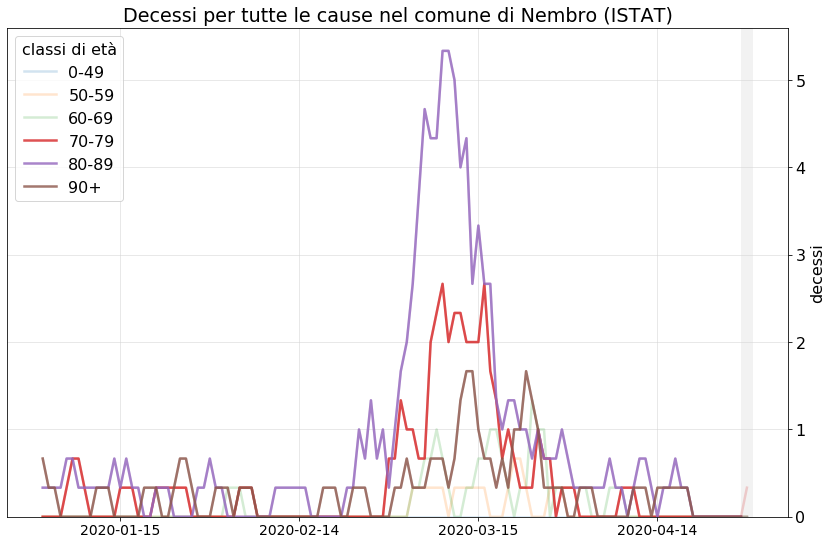

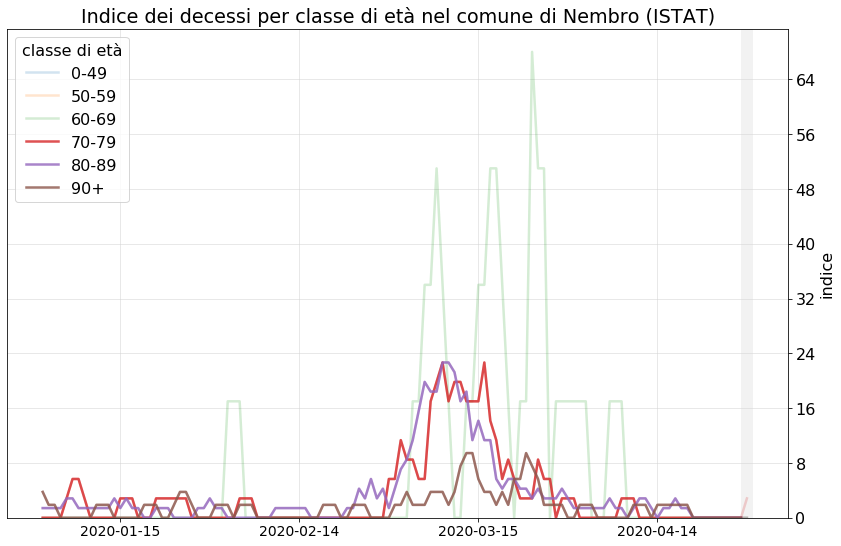

In [17]:
comune = "Nembro"
FI = (None, '2020-04-28')
window = 3

istat_comune = istat.sel(year=2020, location=comune).fillna(0)
istat_comune_frazione = istat_comune / istat_comune.sel(time=slice('2020-01-01', '2020-02-20')).mean('time')

istat_comune_anni = istat.sel(location=comune, time=istat['time'] != np.datetime64('2020-02-29')).sum('age_class')
ax = covid19.plot.plot_xarray(istat_comune_anni, window=window, hue='year', foreground_interval=FI, foreground_hue=[2016, 2020])
_ = ax.set(
    title=f'Decessi per tutte le cause nel comune di {comune} (ISTAT) media mobile {window} giorni',
    ylabel='decessi',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='anno')

ax = covid19.plot.plot_xarray(istat_comune, window=window, foreground_interval=FI, foreground_hue=['70-79', '80-89', '90+'])
_ = ax.set(
    title=f'Decessi per tutte le cause nel comune di {comune} (ISTAT)',
    ylabel='decessi'
)
_ = ax.legend(title='classi di età')


ax = covid19.plot.plot_xarray(istat_comune_frazione, window=window, foreground_interval=FI, foreground_hue=['70-79', '80-89', '90+'])
_ = ax.set(
    title=f'Indice dei decessi per classe di età nel comune di {comune} (ISTAT)',
    ylabel='indice',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='classe di età')


In [ ]:
provincia = 'Ferrara'
FI = (None, '2020-04-30')
window = 7

istat_provincia = istat.groupby('province').sum().sel(province=provincia, year=2020)
istat_provincia_frazione = istat_provincia / istat_provincia.sel(time=slice('2020-01-01', '2020-02-20')).fillna(0).mean('time')

istat_provincia_anni = istat.sel(time=istat['time'] != np.datetime64('2020-02-29')).groupby('province').sum().sel(province=provincia).sum('age_class')
ax = covid19.plot.plot_xarray(istat_provincia_anni, window=window, hue='year', foreground_interval=FI, foreground_hue=[2016, 2020])
_ = ax.set(
    title=f'Decessi per tutte le cause nella provincia di {provincia} (ISTAT) media mobile {window} giorni',
    ylabel='decessi',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='anno')

ax = covid19.plot.plot_xarray(istat_provincia, window=window, foreground_interval=FI, foreground_hue=['70-79', '80-89', '90+'])
_ = ax.set(
    title=f'Decessi per tutte le cause nella provincia di {provincia} (ISTAT)',
    ylabel='decessi'
)
_ = ax.legend(title='classi di età')


ax = covid19.plot.plot_xarray(istat_provincia_frazione, window=window, foreground_interval=FI)
_ = ax.set(
    title=f'Indice dei decessi per classe di età nella provincia di {provincia} (ISTAT)',
    ylabel='indice',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='classe di età')


# istat_provincia_anni.sel(time='2020-03').sum('time')

In [ ]:
provincia = "Lodi"
FI = (None, '2020-04-30')
window = 3

istat_provincia = istat.groupby('province').sum().sel(province=provincia, year=2020)
istat_provincia_frazione = istat_provincia / istat_provincia.sel(time=slice('2020-01-01', '2020-02-20')).fillna(0).mean('time')

istat_provincia_anni = istat.sel(time=istat['time'] != np.datetime64('2020-02-29')).groupby('province').sum().sel(province=provincia).sum('age_class')
ax = covid19.plot.plot_xarray(istat_provincia_anni, window=window, hue='year', foreground_interval=FI, foreground_hue=[2016, 2020])
_ = ax.set(
    title=f'Decessi per tutte le cause nella provincia di {provincia} (ISTAT) media mobile {window} giorni',
    ylabel='decessi',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='anno')

ax = covid19.plot.plot_xarray(istat_provincia, window=window, foreground_interval=FI, foreground_hue=['90+'])
_ = ax.set(
    title=f'Decessi per tutte le cause nella provincia di {provincia} (ISTAT)',
    ylabel='decessi'
)
_ = ax.legend(title='classi di età')


ax = covid19.plot.plot_xarray(istat_provincia_frazione, window=window, foreground_interval=FI)
_ = ax.set(
    title=f'Indice dei decessi per classe di età nella provincia di {provincia} (ISTAT)',
    ylabel='indice',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='classe di età')


# istat_provincia_anni.sel(time='2020-03').sum('time')